# Project Final Report
## Predicting Newsletter Subscription from Player Characteristics 
  
#### **Name:** 
1. Carlos Saliba
2. Simon San
3. Ni Made Chandra Sriwijaya Putri
4. Maxwell Wong

#### **Course:** DSCI 100_004_Group 5  

This project explores whether player characteristics and behaviors can predict whether a player subscribes to the Minecraft research newsletter.

## Introduction

### Background Information

Understanding player behaviour is essential for designing effective communication strategies in online gaming communities. In this project, we analyze data collected from a Minecraft research server developed by a UBC Computer Science research group led by Frank Wood. The server records players’ actions and demographic information, creating opportunities to study how different types of players engage with the game environment.

One challenge faced by the research team is efficiently recruiting and maintaining participants for their studies. One possible indicator of engagement is whether players subscribe to the project’s game-related newsletter. Identifying which player characteristics predict newsletter subscription can help the research team better allocate resources such as server capacity and outreach efforts.

### Questions to be Answered 

_What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ across various player types?_

More specifically, we examine whether attributes such as hours of gameplay and age (from players.csv) help predict whether a player subscribes to the newsletter.

### Data Description

#### players.csv
- **Number of observations: 196**
- **Number of variables: 7**
- **Description:** Contains player demographic and behavioral information.

| Category | Type | Description|
|----------|------|------------|
|`experience`| Character | Player's experience categorized as Amateur, Beginner, Regular, Veteran, or Pro|
|`subscribe`| Logical | Whether the player is subscribed to a game-related newspaper or not. TRUE = subscribed, FALSE = not subscribed |
|`hashedEmail` | Character | Hashed email of players to identify players between data like `sessions.csv` while protecting privacy |
|`played_hours`| Numeric | Amount of server play time in hours |
|`name`| Character | Name of player |
|`gender`| Character | Gender of player (Male/Female)|
|`Age`| Numeric | Age of player in years |


#### Summary Statistics for Data Description

In [1]:
library(tidyverse)

#preview data
players_url <- "https://raw.githubusercontent.com/NiMadeChandra/Final-Project-DSCI-100-004_Group-5/refs/heads/main/players.csv"
players <- read_csv(players_url)
head(players)

#total observations/players
total_obs <- nrow(players)
total_var <- ncol(players)
paste("Total Observation of Players Data: ", total_obs)
paste("Total Variabel of Players Data: ", total_var)

#experience summary stats
experience_sum <- players |>
  summarize(
    `Subscribe` = sum(subscribe == TRUE, na.rm = TRUE),
    `Not Subscribe` = sum(subscribe == FALSE, na.rm = TRUE),
    `Total Observation` = n(),
    `Percentage of Subscribers` = `Subscribe` / `Total Observation`* 100,
    `Percentage of Non Subscribers` = `Not Subscribe` / `Total Observation` * 100) |>
  round(2)

#played hours summary stats
played_hours_sum <- players |>
  summarize(
    `Minimum` = min(played_hours, na.rm = TRUE),
    `Q1` = quantile(played_hours, 0.25, na.rm = TRUE),
    `Median` = median(played_hours, na.rm = TRUE),
    `Mean` = mean(played_hours, na.rm = TRUE),
    `Q3` = quantile(played_hours, 0.75, na.rm = TRUE),
    `Maximum` = max(played_hours, na.rm = TRUE)
  ) |>
  round(3)

#age summary stats
age_sum <- players |>
  summarize(
    `Minimum` = min(Age, na.rm = TRUE),
    `Q1` = quantile(Age, 0.25, na.rm = TRUE),
    `Median` = median(Age, na.rm = TRUE),
    `Mean` = mean(Age, na.rm = TRUE),
    `Q3` = quantile(Age, 0.75, na.rm = TRUE),
    `Maximum` = max(Age, na.rm = TRUE)
  ) |>
  round(2)

#gender summary stats
gender_sum <- players |>
  mutate(gender = as.factor(gender)) |>
  summarize(
    Female = sum(gender == "Female", na.rm = TRUE),
    Male = sum(gender == "Male", na.rm = TRUE),
    Other = sum(gender == "Other", na.rm = TRUE),
    Total = n()
  ) |>
  mutate(
    `Percentage Female` = Female / Total * 100,
    `Percentage Male` = Male / Total * 100,
    `Percentage Other` = Other / Total * 100
  ) |>
  round(2)

cat("\n \nSummary of Player Subscription\n")
list(experience_sum)

cat("\n Summary of Played Hours\n")
list(played_hours_sum)

cat("\n Summary of Player Age\n")
list(age_sum)

cat("\n Summary of Player Gender\n")
list(gender_sum)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] "Total Observation of Players Data:  196"

[1] "Total Variabel of Players Data:  7"


 
Summary of Player Subscription


Subscribe,Not Subscribe,Total Observation,Percentage of Subscribers,Percentage of Non Subscribers
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
144,52,196,73.47,26.53



 Summary of Played Hours


Minimum,Q1,Median,Mean,Q3,Maximum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.1,5.846,0.6,223.1



 Summary of Player Age


Minimum,Q1,Median,Mean,Q3,Maximum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,17,19,21.14,22.75,58



 Summary of Player Gender


Female,Male,Other,Total,Percentage Female,Percentage Male,Percentage Other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,124,1,196,18.88,63.27,0.51


#### Potential Issues
- `played_hours` has a median of 0.10 and a maximum of 223.10, indicating that the distribution of data maybe skewed and affect our classification.
- There are 2 players who are missing information for `Age` (NA).
- There maybe bias in participation with an imbalance in `gender` of players, and a high participation by players who are subscribed.

## Methods 

To investigate our question, we performed a full data analysis workflow in a Jupyter Notebook. Our methods, supported by the accompanying code, follow the steps described below.

### Data Import and Cleaning
- We began by loading the dataset (players.csv) directly into our notebook.
- After examining its structure, we removed missing or inconsistent values and standardised any variables that required formatting.
- We also confirmed that key variables such as age, hours played, and newsletter subscription status were correctly encoded.

### Exploratory Data Analysis
Next, we summarised and visualised the dataset to understand patterns and distributions. This included:
- Plotting histograms of age and hours played
- Creating bar charts for subscription rates
- Comparing characteristics among different player types.
These visualisations helped us identify relationships worth testing further.

### Data Splitting
To build a predictive model, we split the dataset into:
- A training set used to fit our model
- A test set used to evaluate model performance on unseen data
This ensured a fair assessment of how well the model generalises.

### Building the Predictive Model
We used a **classification model** to predict whether a player subscribes to the newsletter.
The model used player characteristics as predictors, including:
- hours played
- age
- player type
- Any additional relevant behavioural features available in the dataset.
We trained the model using cross-validation to select optimal hyperparameters and prevent overfitting.

### Model Evaluation
We evaluated model performance using metrics such as:
- Accuracy
- Confusion matrices
- Classification error.
We then used the test set to estimate how accurately the model predicts subscription status for new, unseen players.

### Key Findings
- From the results of our model and exploratory analyses, we identified which player characteristics contribute most strongly to predicting newsletter subscription.
- We also compared these characteristics across different player types to understand behavioural differences in the game environment.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


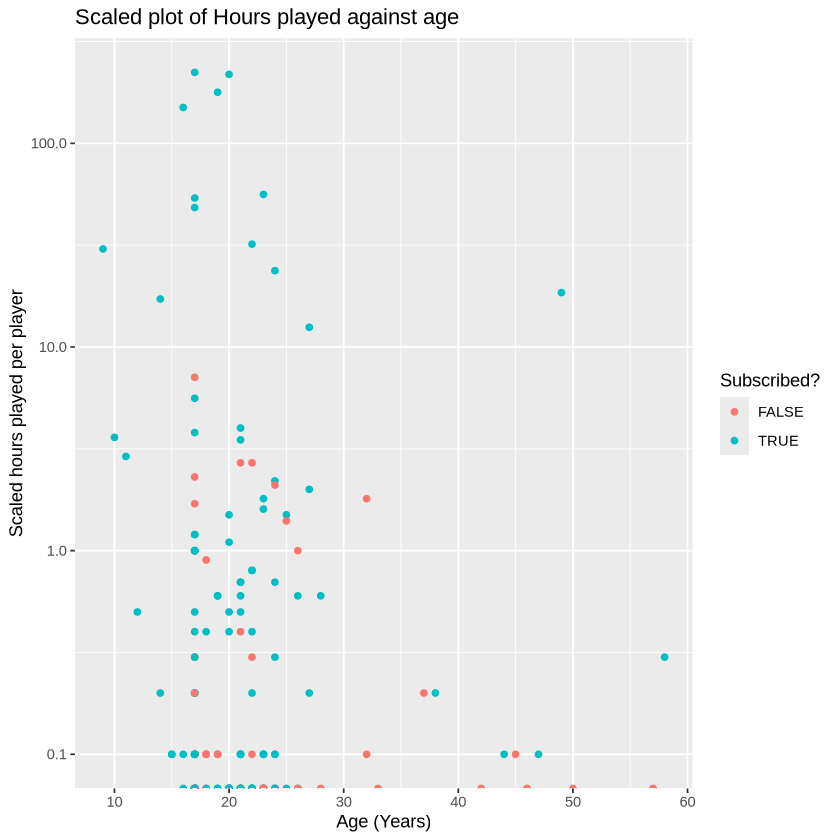

In [2]:
scaled_both_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
        geom_point() +
        scale_y_log10() +
        labs(x = "Age (Years)", y = "Scaled hours played per player", color = "Subscribed?") +
        ggtitle("Scaled plot of Hours played against age")
scaled_both_plot

To get a bit of an idea of what the data looks like, we plotted hours_played against Age and scaled the y axis as most players played very little. 

In [3]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


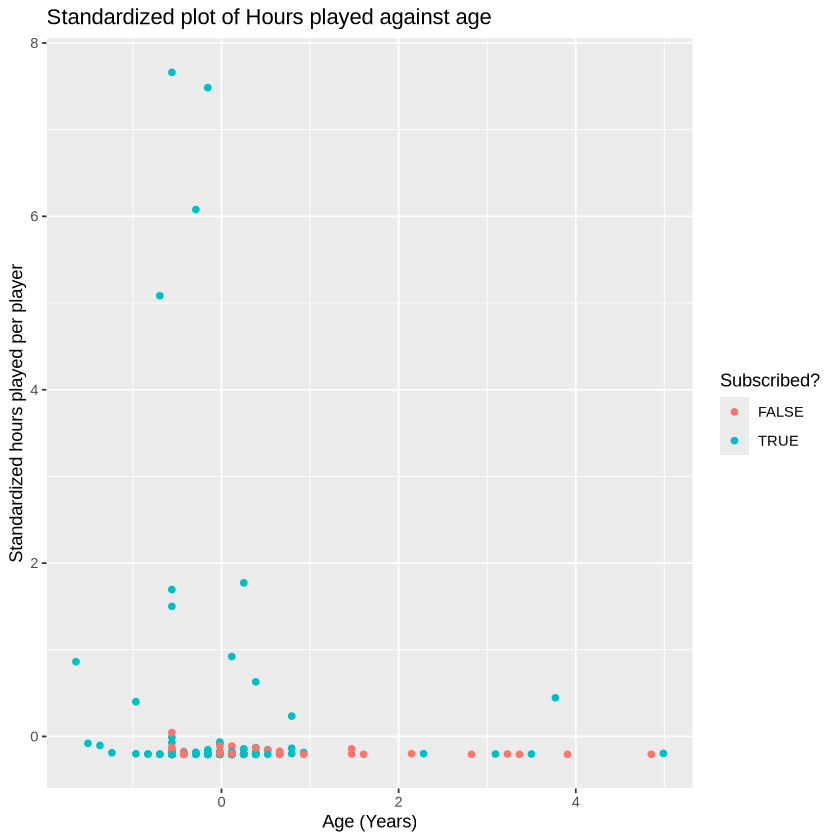

In [4]:
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

preprocessed_data <- players_recipe |>
    prep() |>
    bake(players)

standardized_both_plot <- preprocessed_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
        geom_point() +
        labs(x = "Age (Years)", y = "Standardized hours played per player", color = "Subscribed?") +
        ggtitle("Standardized plot of Hours played against age")
standardized_both_plot

[1] "FALSE" "TRUE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7714286


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.75


          Truth
Prediction FALSE TRUE
     FALSE     5    9
     TRUE      8   27

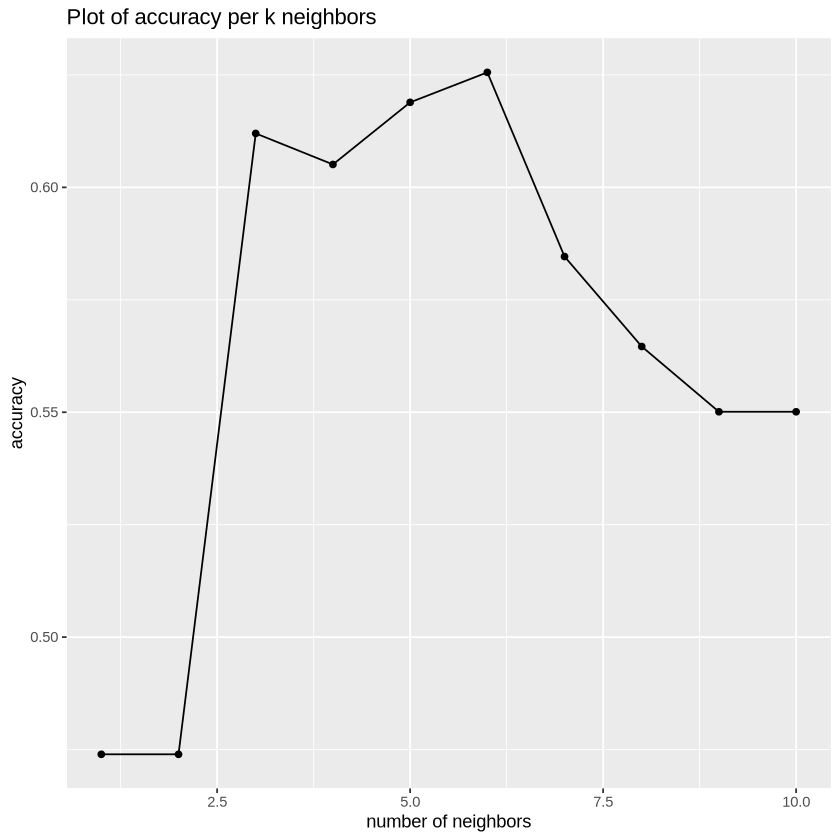

In [9]:
set.seed(20)
options(repr.matrix.max.rows = 6)

kvals = tibble(neighbors = seq(from = 1, to = 10, by = 1))

players <- players |>
    mutate(subscribe = as_factor(subscribe))

split <- initial_split(players, prop = 0.75, strata = subscribe)
players_training <- training(split)
players_testing <- testing(split)

training_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>
    step_impute_mean(all_numeric_predictors()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_vfold, grid = kvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

k_plot <- players_fit |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "number of neighbors", y = "accuracy") +
        ggtitle("Plot of accuracy per k neighbors")
k_plot 
#WE FIND THAT 6 NEIGHBORS IS THE BEST

new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
    set_engine("kknn") |>
    set_mode("classification")

new_players_fit <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(new_knn_spec) |>
    fit(players_training)

players_prediction <- predict(new_players_fit, players_testing) |>
    bind_cols(players_testing)

players_prediction |> pull(subscribe) |> levels()

players_prediction |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "second")
  
players_prediction |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "second")

players_mat <- players_prediction |> 
       conf_mat(truth = subscribe, estimate = .pred_class)
players_mat
